## **Importing Libraries and Loading dataset:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("house_prices.csv", index_col=False)

## **Sanity check and data cleaning:**

In [3]:
df.head()

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


In [4]:
df.shape

(99499, 9)

In [6]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
df.head()

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


In [8]:
# no null values present
df.isnull().sum()

property_type    0
price            0
location         0
city             0
baths            0
purpose          0
bedrooms         0
Area_in_Marla    0
dtype: int64

In [9]:
# duplicates present in the dataset
df.duplicated().sum()

37858

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(61641, 8)

In [24]:
for i in df.select_dtypes(include="object").columns:
    print(f"COLUMN NAME IS '{i}': ")
    print(df[i].value_counts())
    print("---------------------------------------------------------")

COLUMN NAME IS 'property_type': 
property_type
House            35014
Flat             17170
Upper Portion     5221
Lower Portion     3702
Penthouse          239
Room               213
Farm House          82
Name: count, dtype: int64
---------------------------------------------------------
COLUMN NAME IS 'location': 
location
DHA Defence               4728
Bahria Town Rawalpindi    2462
Gulistan-e-Jauhar         2262
Gulshan-e-Iqbal Town      2087
E-11                      1392
                          ... 
Al Qaim Town                 1
Jati Umra Road               1
Kacheri Chowk                1
Paradise Valley              1
Shahra-e-Liaquat             1
Name: count, Length: 1389, dtype: int64
---------------------------------------------------------
COLUMN NAME IS 'city': 
city
Karachi       22048
Islamabad     15389
Lahore        14550
Rawalpindi     7563
Faisalabad     2091
Name: count, dtype: int64
---------------------------------------------------------
COLUMN NAME IS 'pur

In [52]:
df["purpose"] = df["purpose"].replace("For ", "", regex=True)

In [55]:
df["city"] = df["city"].replace({"Islamabad": "ISL", "Karachi": "KHI", "Lahore": "LHE", "Rawalpindi": "RWP", "Faisalabad": "FSL"}, regex=True)

In [58]:
print(df["city"].value_counts())

city
KHI    22048
ISL    15389
LHE    14550
RWP     7563
FSL     2091
Name: count, dtype: int64


## **Statistical Summary:**

In [27]:
# statistical summary for numerical columns
df.describe()

# the numerical columns are on different scales, we'll standardize the data later

,price,baths,bedrooms,Area_in_Marla
count,6.164100e+04,61641.000000,61641.000000,61641.000000
mean,9.610426e+06,3.453383,3.334307,8.591924
std,1.030790e+07,1.483044,1.303504,8.145067
min,1.550000e+04,1.000000,0.000000,0.000000
25%,1.350000e+05,2.000000,2.000000,4.400000
50%,6.600000e+06,3.000000,3.000000,6.000000
75%,1.480000e+07,4.000000,4.000000,10.000000
max,4.490000e+07,7.000000,6.000000,194.000000


In [30]:
# statistical summary for non-numerical(objects) columns
df.describe(include="object").T

,count,unique,top,freq
property_type,61641,7,House,35014
location,61641,1389,DHA Defence,4728
city,61641,5,Karachi,22048
purpose,61641,2,For Sale,43574


## **Univariate Analysis:**

In [31]:
df.select_dtypes(include="number").columns

Index(['price', 'baths', 'bedrooms', 'Area_in_Marla'], dtype='object')

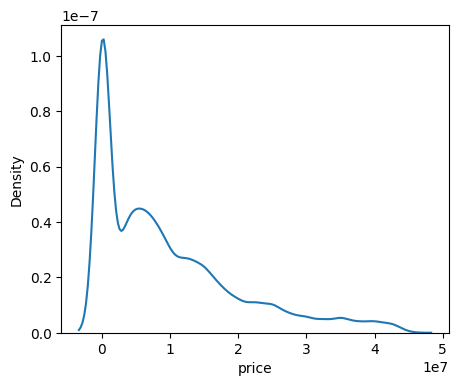

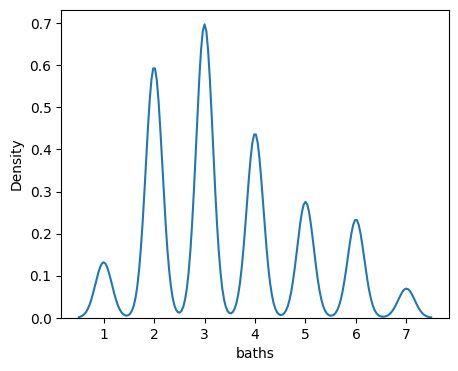

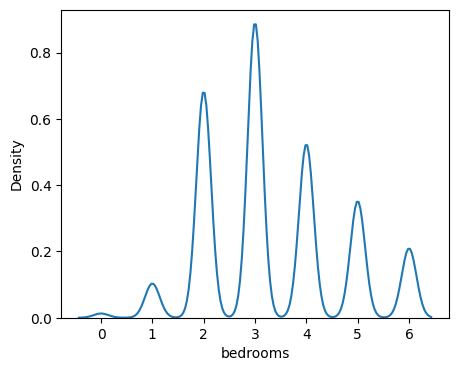

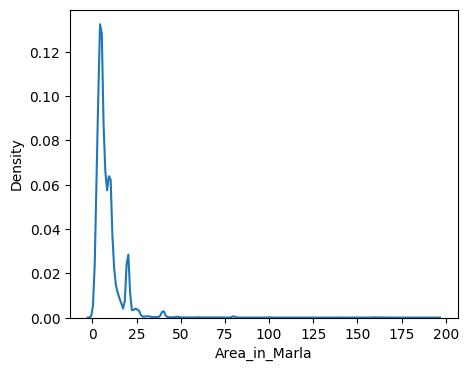

In [37]:
for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(5, 4))
    sns.kdeplot(data=df, x=i)
    plt.show()

## **Bivariate Analysis:**

In [38]:
'''identify the potential dependent feature in the dataset and then use scatterplot relationship between that potential dependent feature and all the other
numerical features in order to find the relaionships between them'''

'identify the potential dependent feature in the dataset and then use scatterplot relationship between that potential dependent feature and all the other\nnumerical features in order to find the relaionships between them'

In [40]:
df.select_dtypes(include="number").columns

Index(['price', 'baths', 'bedrooms', 'Area_in_Marla'], dtype='object')

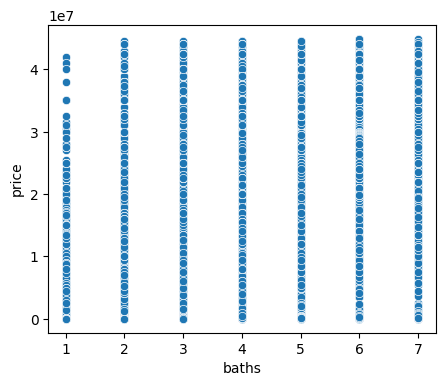

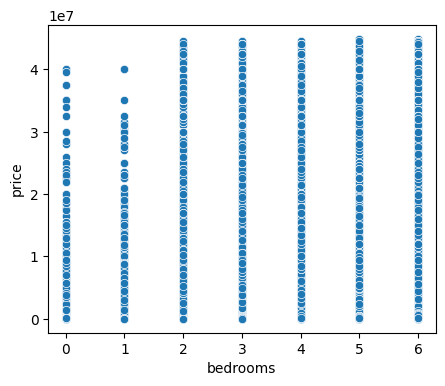

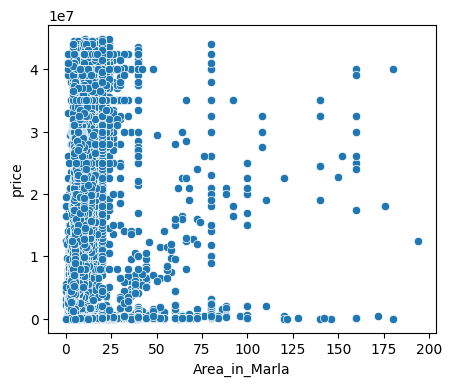

In [43]:
for i in ['baths', 'bedrooms', 'Area_in_Marla']:
    plt.figure(figsize=(5, 4))
    sns.scatterplot(data=df, x=i, y="price")
    plt.show()

<Axes: >

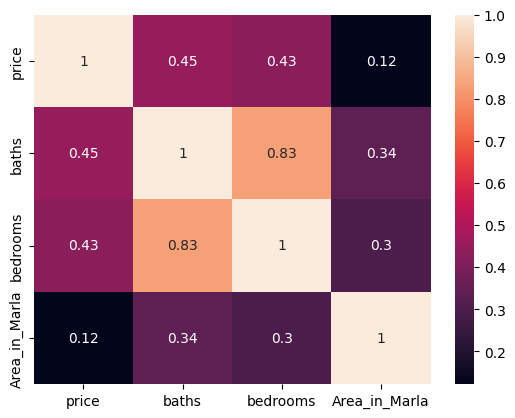

In [44]:
# we can see both in the scatter plot and heatmap that there is a strong positive correlation between price and house area in marla
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True)

## **Categorical Columns:**

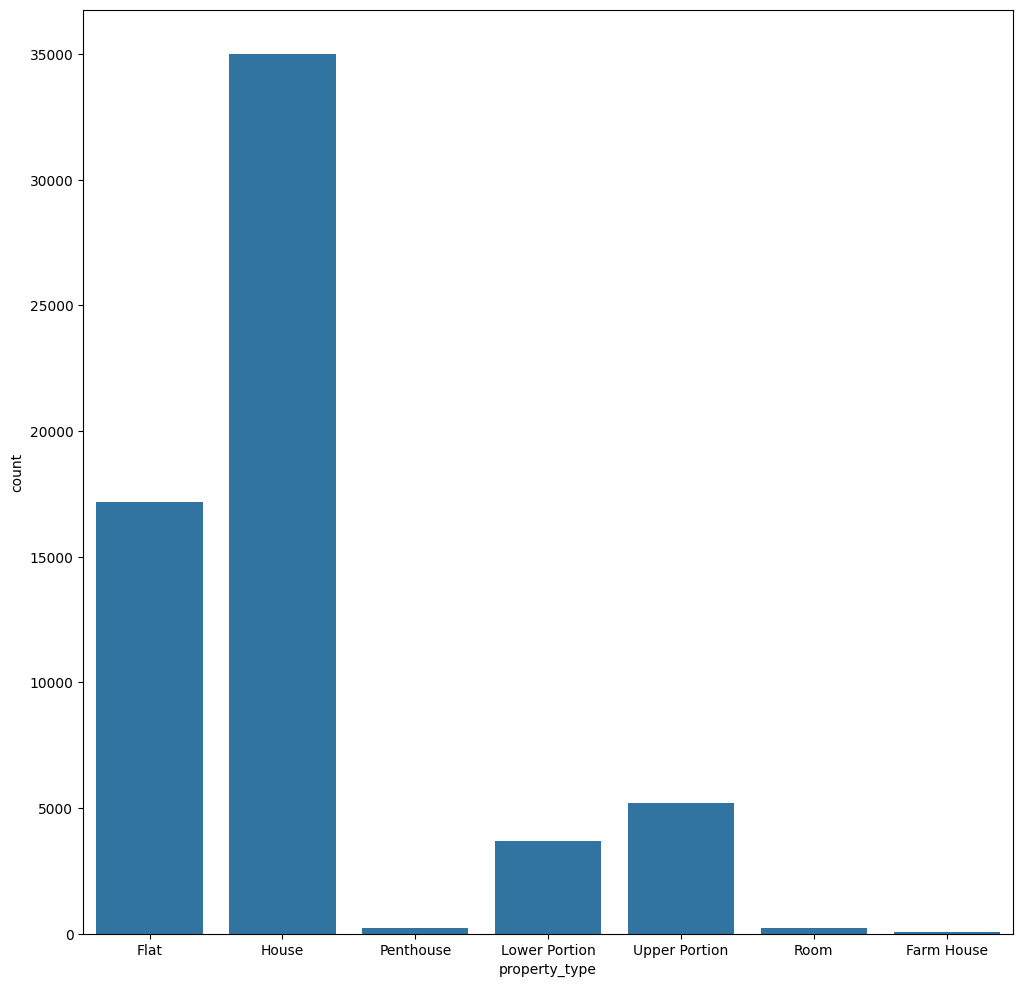

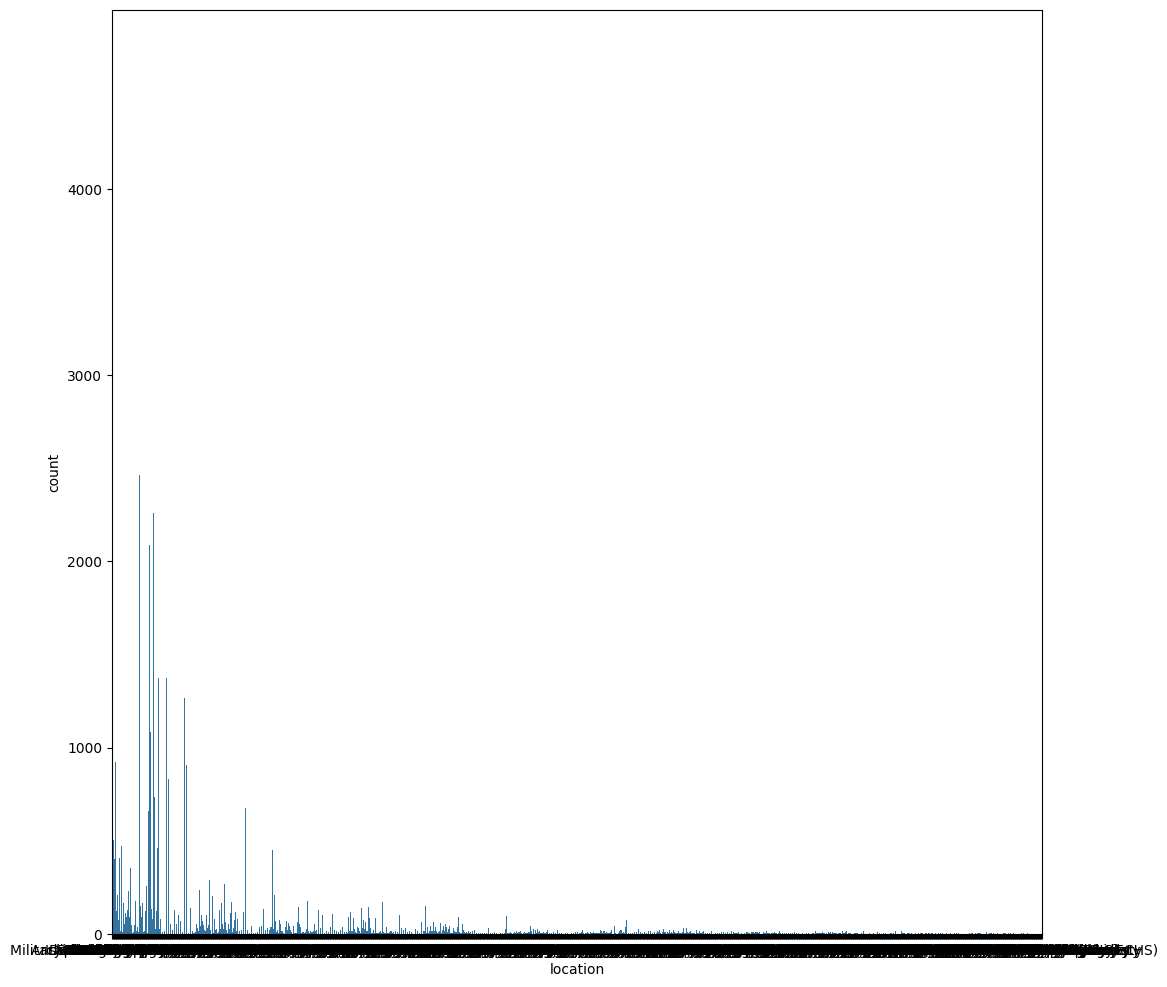

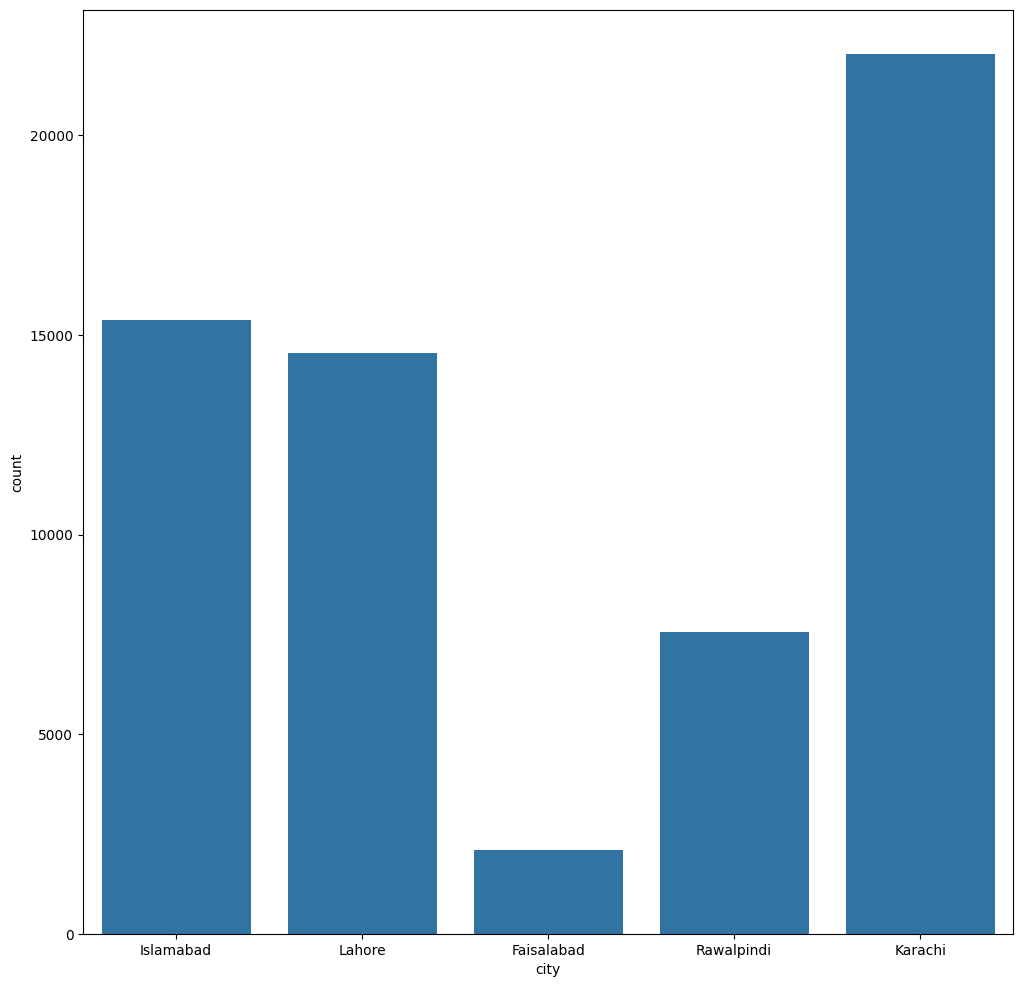

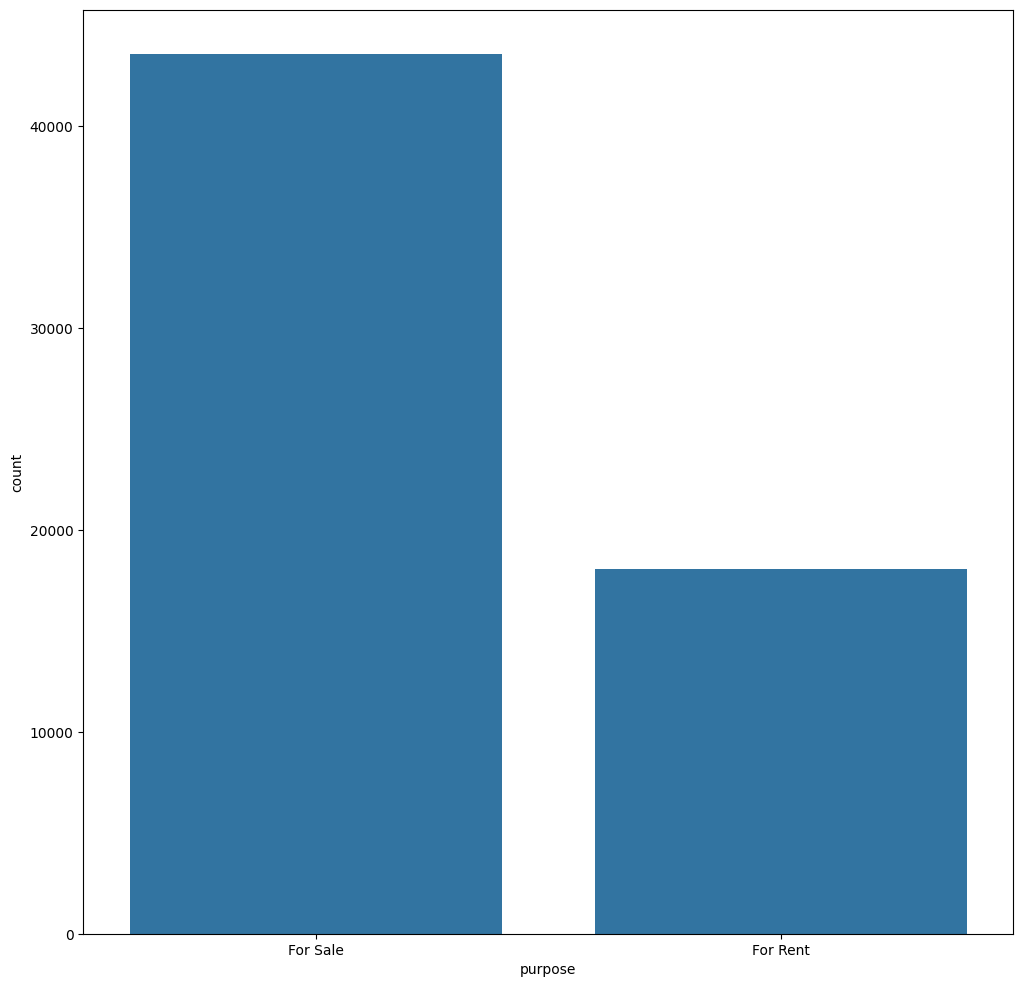

In [51]:
for i in df.select_dtypes(include="object").columns:
    plt.figure(figsize=(12, 12))
    sns.countplot(data=df, x=i)
    plt.show()

## **Outlier Detection and handling:**

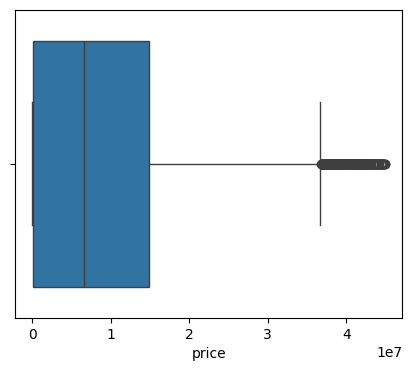

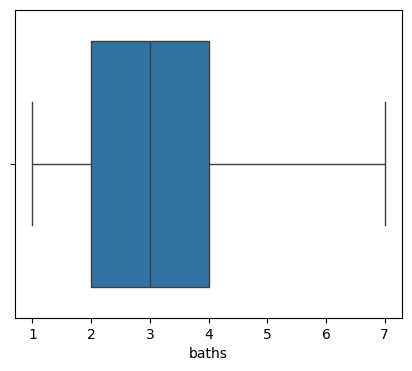

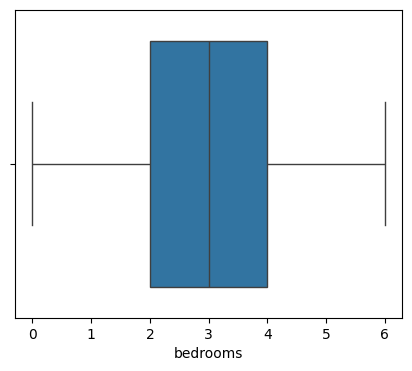

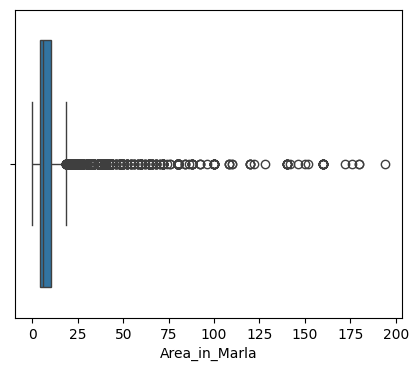

In [48]:
# we can visualize that outliers are present in the "area in marla" column and "price" column
for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(5, 4))
    sns.boxplot(data=df, x=i)
    plt.show()

In [49]:
# we don't perform outlier treatment for target variables and discrete numerical data

## **Documentaton of insights obtained while performing EDA:**

In [59]:
# duplicates values were present (treated them)
# there is a best relationship between price and area of house in marla